In [3]:
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, recall_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import normalize

In [4]:
def parse_fasta_to_dataframe(fasta_path):
    records = []
    with open(fasta_path, 'r') as file:
        name, position, seq_lines = None, None, []
        for line in file:
            line = line.strip()
            if line.startswith('>'):
                if name:
                    sequence = ''.join(seq_lines)
                    tag = 0 if position in ['Nucleus', 'Cytosol'] else 1
                    records.append({'name': name, 'position': position, 'sequence': sequence, 'tag': tag})
                # 处理新的记录
                header_parts = line[1:].split()
                name = header_parts[0]
                position = header_parts[1] if len(header_parts) > 1 else 'Unknown'
                seq_lines = []
            else:
                seq_lines.append(line)
        # 添加最后一条记录
        if name:
            sequence = ''.join(seq_lines)
            tag = 0 if position in ['Nucleus', 'Cytosol'] else 1
            records.append({'name': name, 'position': position, 'sequence': sequence, 'tag': tag})
    
    return pd.DataFrame(records)

In [5]:
df = parse_fasta_to_dataframe('/BioII/lulab_b/huangkeyun/zhangys/RNA_locator/python_scripts/ML_models/circRNA_ML_Model_Output/test_set_sequences1.fasta')
df

,name,position,sequence,tag
0,hsa_circ_0005620,Nucleus,GTGCCGACGCCACCGCCGAGCCCATGATCCTGGAACAGTACGTGGT...,0
1,hsa_circ_0002281,Cytosol,ACTCCTTTCTACGAAACCGTTCAAGTTCTGACCATGAAGCTACAGC...,0
2,mmu_circ_0001468,Extracellular,GTATGGCCTCACATGTGCAAGTTTTCTCCCCTCACACCCTTCAATC...,1
3,hsa_circ_0001801,Extracellular,GATTAATTTATTTTTGGAAATCAAGTGCAATATTGGAAGCCATTTC...,1
4,hsa_circ_0001025,Cytosol,ACACGTCAAGTTCTTGAGGAGCTGACTGAGTTGCCTGTGATGGTGG...,0
...,...,...,...,...
124,hsa_circ_0001177,Cytosol,GAAGTGTTTGGATTGTGAGCTATTTCAGAACTGTTCTCAGGACTCA...,0
125,mmu_circ_0002373,Cytosol,GATGACCAGACTCCACTCCACATCTCAGCCCGACTTGGGAAAGCTG...,0
126,hsa_circ_0001997,Cytosol,CCTGCCCTCAAGTATGTGTTGTATACATTGGTTGGCTTTGTGGGTT...,0
127,hsa_circ_0108960,Cytosol,ATTCCACACCAAATCATCCATCACAAACAACGCCTGCCCAAAAGAA...,0


In [6]:
pred = pd.read_csv('/BioII/lulab_b/huangkeyun/zhangys/RNA_locator/benchmark_evaluation/exoGRU/output1.csv')
pred

,sequence,prob
0,GTGCCGACGCCACCGCCGAGCCCATGATCCTGGAACAGTACGTGGT...,0.103184
1,ACTCCTTTCTACGAAACCGTTCAAGTTCTGACCATGAAGCTACAGC...,0.095442
2,GTATGGCCTCACATGTGCAAGTTTTCTCCCCTCACACCCTTCAATC...,0.062304
3,GATTAATTTATTTTTGGAAATCAAGTGCAATATTGGAAGCCATTTC...,0.124792
4,ACACGTCAAGTTCTTGAGGAGCTGACTGAGTTGCCTGTGATGGTGG...,0.196680
...,...,...
124,GAAGTGTTTGGATTGTGAGCTATTTCAGAACTGTTCTCAGGACTCA...,0.760096
125,GATGACCAGACTCCACTCCACATCTCAGCCCGACTTGGGAAAGCTG...,0.553744
126,CCTGCCCTCAAGTATGTGTTGTATACATTGGTTGGCTTTGTGGGTT...,0.731390
127,ATTCCACACCAAATCATCCATCACAAACAACGCCTGCCCAAAAGAA...,0.435428


In [7]:
evaluate_df = pd.concat([df, pred], axis = 1)
evaluate_df

,name,position,sequence,tag,sequence,prob
0,hsa_circ_0005620,Nucleus,GTGCCGACGCCACCGCCGAGCCCATGATCCTGGAACAGTACGTGGT...,0,GTGCCGACGCCACCGCCGAGCCCATGATCCTGGAACAGTACGTGGT...,0.103184
1,hsa_circ_0002281,Cytosol,ACTCCTTTCTACGAAACCGTTCAAGTTCTGACCATGAAGCTACAGC...,0,ACTCCTTTCTACGAAACCGTTCAAGTTCTGACCATGAAGCTACAGC...,0.095442
2,mmu_circ_0001468,Extracellular,GTATGGCCTCACATGTGCAAGTTTTCTCCCCTCACACCCTTCAATC...,1,GTATGGCCTCACATGTGCAAGTTTTCTCCCCTCACACCCTTCAATC...,0.062304
3,hsa_circ_0001801,Extracellular,GATTAATTTATTTTTGGAAATCAAGTGCAATATTGGAAGCCATTTC...,1,GATTAATTTATTTTTGGAAATCAAGTGCAATATTGGAAGCCATTTC...,0.124792
4,hsa_circ_0001025,Cytosol,ACACGTCAAGTTCTTGAGGAGCTGACTGAGTTGCCTGTGATGGTGG...,0,ACACGTCAAGTTCTTGAGGAGCTGACTGAGTTGCCTGTGATGGTGG...,0.196680
...,...,...,...,...,...,...
124,hsa_circ_0001177,Cytosol,GAAGTGTTTGGATTGTGAGCTATTTCAGAACTGTTCTCAGGACTCA...,0,GAAGTGTTTGGATTGTGAGCTATTTCAGAACTGTTCTCAGGACTCA...,0.760096
125,mmu_circ_0002373,Cytosol,GATGACCAGACTCCACTCCACATCTCAGCCCGACTTGGGAAAGCTG...,0,GATGACCAGACTCCACTCCACATCTCAGCCCGACTTGGGAAAGCTG...,0.553744
126,hsa_circ_0001997,Cytosol,CCTGCCCTCAAGTATGTGTTGTATACATTGGTTGGCTTTGTGGGTT...,0,CCTGCCCTCAAGTATGTGTTGTATACATTGGTTGGCTTTGTGGGTT...,0.731390
127,hsa_circ_0108960,Cytosol,ATTCCACACCAAATCATCCATCACAAACAACGCCTGCCCAAAAGAA...,0,ATTCCACACCAAATCATCCATCACAAACAACGCCTGCCCAAAAGAA...,0.435428


In [8]:
auroc = roc_auc_score(evaluate_df["tag"], evaluate_df["prob"])
print(f"AUROC: {auroc:.4f}")

AUROC: 0.5673


In [9]:
evaluate_df['prediction'] = (evaluate_df['prob'] >= 0.5).astype(int)

In [10]:
accuracy = accuracy_score(evaluate_df['tag'], evaluate_df['prediction'])
sensitivity = recall_score(evaluate_df['tag'], evaluate_df['prediction'])  # Sensitivity = True Positive Rate
specificity = recall_score(evaluate_df['tag'], evaluate_df['prediction'], pos_label=0)  # Specificity = True Negative Rate
f1 = f1_score(evaluate_df['tag'], evaluate_df['prediction'])

print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity: {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.4729
Sensitivity: 0.6400
Specificity: 0.4327
F1 Score: 0.3200


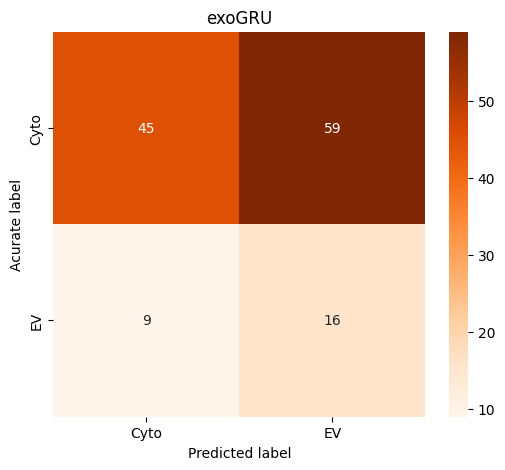

In [11]:
cm = confusion_matrix(evaluate_df['tag'], evaluate_df['prediction'])

# 使用 seaborn 绘制混淆矩阵
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Cyto', 'EV'], yticklabels=['Cyto', 'EV'])
plt.title('exoGRU')
plt.ylabel('Acurate label')
plt.xlabel('Predicted label')
plt.show()

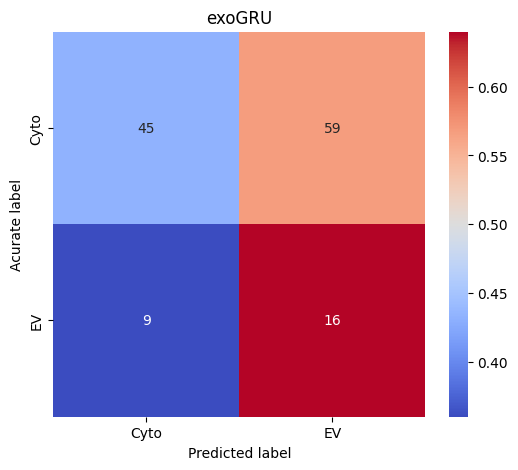

In [16]:
cm_normalized = normalize(cm, norm='l1', axis=1)

# 使用 seaborn 绘制混淆矩阵
plt.figure(figsize=(6, 5))
sns.heatmap(cm_normalized, annot=cm, fmt='d', cmap='coolwarm', xticklabels=['Cyto', 'EV'], yticklabels=['Cyto', 'EV'])
plt.title('exoGRU')
plt.ylabel('Acurate label')
plt.xlabel('Predicted label')
plt.show()
